In [5]:
from scipy import optimize as opt
import numpy as np

![title](https://miro.medium.com/max/477/1*BjFmXU_is1aCHWU2sJj6pQ.png)
![title](https://miro.medium.com/max/212/1*vaUPZ54F_WppR_KRVf-S-g.png)

## Bounds and Linear Constraints

In [26]:
def f(x):
    return (x[0]-5)**2 + (x[1]-6)**2

bounds = opt.Bounds([0,0],[np.inf, np.inf])
lin_const = opt.LinearConstraint([[1,2],[0,0]], [-np.inf, 0], [4,0])

## Nonlinear Constraints

In [33]:
def cons_f(x):
    return [x[0]**2 - 4, np.exp(-x[0]) - 1]

def cons_J(x):
    return [[2*x[0], 0], [-np.exp(-x[0]), -1]]

def cons_H(x, v):
    return v[0]*np.array([[2,0], [0,0]]) + v[1]*np.array([[np.exp(-x[0]), 0], [0,0]])

nonlin_const = opt.NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H)

## Solving the optimization problem

In [47]:
x0 = np.array([0.50, 0.75])
res = opt.minimize(f, x0, method='trust-constr', bounds=bounds, constraints=[lin_const, nonlin_const], options={'verbose': 1})
print(res.x)

`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 33, CG iterations: 10, optimality: 1.89e-09, constraint violation: 0.00e+00, execution time: 0.013 s.
[2.23414025 0.88285154]


## TODO

- [ ] Jacobian Matrix for minimize
- [ ] Hessian Matrix for minimize


## Visualisation

In [69]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [79]:
x0 = np.arange(0.2, 3.2, 0.2)
x1 = np.arange(0.1, 1.2, 0.2)

X0, X1 = np.meshgrid(x0, x1)
fx = (X0-5)**2 + (X1-6)**2

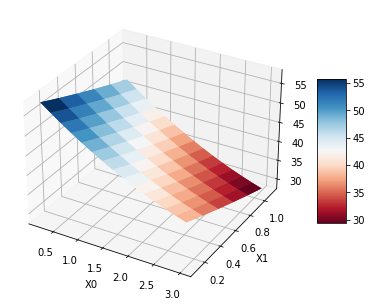

In [83]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
fig.colorbar(ax.plot_surface(X0, X1, fx,cmap=cm.RdBu), shrink=0.5, aspect=5)
ax.plot_surface(X0, X1, fx,cmap=cm.RdBu)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()